# Problem Discription :

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Data Analysis

In [6]:

#importing pandas and numpy libraries
import pandas as pd
import numpy as np

In [7]:
#Reading the DataSet to work on the Data Project and adding in the dataframe
dfloan= pd.read_csv(r'loan.csv')

In [8]:
dfloan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
# reading the number of columns from the data set baseball.
dfloan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#Check data shape (num of Rows & Columns)
dfloan.shape

(614, 13)

Observation - There are 614 rows and 13 columns

In [11]:
# preprocessing the Dataset by dealing with the missing values in the Dataset
dfloan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation - There are null values present in our dataset

In [12]:
# replacing the Nan vslues in gender column with Not available
dfloan2 = pd.DataFrame(dfloan)
dfloan2['Gender'].fillna("Not available", inplace = True)
# replacing the Nan vslues in Dependents column with Not available
dfloan2['Dependents'].fillna("Not available", inplace = True)
# replacing the Nan vslues in Dependents column with Not available
dfloan2['Married'].fillna("Not available", inplace = True)
# replacing the Nan vslues in Dependents column with Not available
dfloan2['Self_Employed'].fillna("Not available", inplace = True)



In [13]:
# replacing the Nan vslues in Self_Employed,LoanAmount, Loan_Amount_Term and Credit_History with its mean value


meanLoanAmount=dfloan2["LoanAmount"].mean()
meanLoan_Amount_Term=dfloan2["Loan_Amount_Term"].mean()
meanCredit_History=dfloan2["Credit_History"].mean()

dfloan2['LoanAmount'].fillna(value=meanLoanAmount, inplace=True)
dfloan2['Loan_Amount_Term'].fillna(value=meanLoan_Amount_Term, inplace=True)
dfloan2['Credit_History'].fillna(value=meanCredit_History, inplace=True)



In [14]:
dfloan2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observation - All the Nan values are deducted from the dataset

In [15]:
dfloan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation -

    There are no Null values in the Data set So we wont work on Data cleaning.We will move ahead to check the Data types

    There are 614 samples in the training dataset

    There are no missing values in the dataset`

    There are both categorical and numerical columns in the dataset



# Data Visualization

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

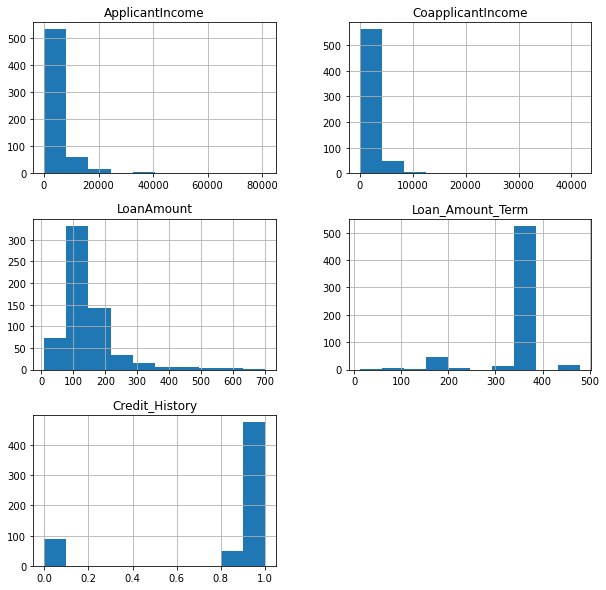

In [17]:
dfloan2.hist(figsize=(10,10))

In [18]:
# Getting More information about the data can be gathered by using
dfloan2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [19]:
#Checking the data type for the new Numerical data frame
dfloan2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:xlabel='count', ylabel='Education'>

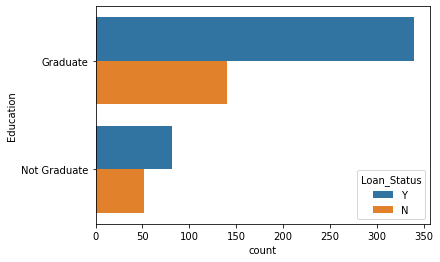

In [20]:
sns.countplot(y='Education', hue='Loan_Status', data = dfloan2)

In [21]:
Observation - Graduate people get more Loan eligible

SyntaxError: invalid syntax (Temp/ipykernel_4188/3242510308.py, line 1)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

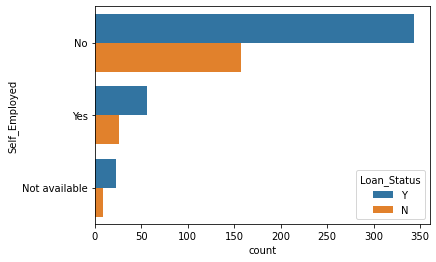

In [22]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data = dfloan2)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

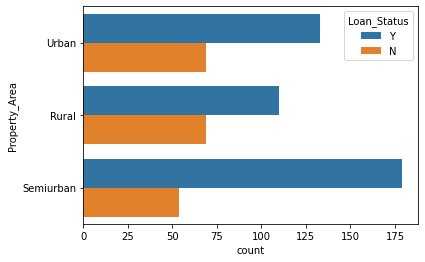

In [23]:
sns.countplot(y='Property_Area', hue='Loan_Status', data = dfloan2)

    

In [24]:
Observation - People residing in semi urban are  get more Loan eligible.

SyntaxError: invalid syntax (Temp/ipykernel_4188/1598780935.py, line 1)

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

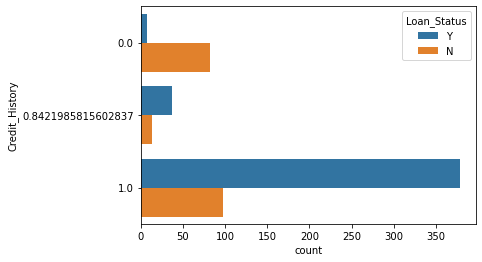

In [25]:
sns.countplot(y='Credit_History', hue='Loan_Status', data = dfloan2)

Observation - People with credid score as 1.0 are more eligible for loan .

In [26]:
# checking the data types
dfloan2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
dfloan2['primary_fuel'] = dfPlant4['primary_fuel'].astype(int)

NameError: name 'dfPlant4' is not defined

In [ ]:
# Visualization of Gender
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.countplot(x="Gender", data=dfloan2, facecolor=(0, 0, 0, 0), linewidth=10, 
                  edgecolor=sns.color_palette("dark",24)).set_title("Gender  Distribution")
plt.xlabel("Gender")

In [ ]:
# Visualization of Gender
fig, ax = plt.subplots(figsize=(5, 3))
ax = sns.countplot(x="Married", data=dfloan2, facecolor=(0, 0, 0, 0), linewidth=10, 
                  edgecolor=sns.color_palette("dark",24)).set_title("Married  Distribution")
plt.xlabel("Married")

In [ ]:
# Corelation 
dfloan2.corr()

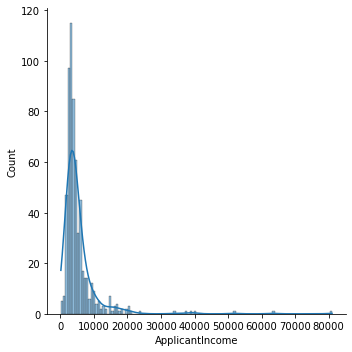

In [28]:
#Visualization to check skewness in ApplicantIncome
import seaborn as sns

sns.displot(dfloan2['ApplicantIncome'],kde =True)

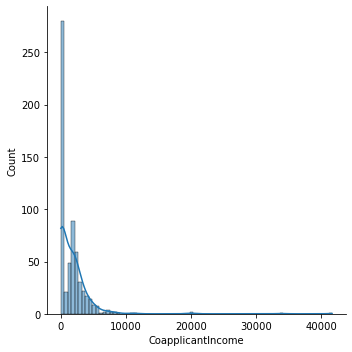

In [29]:
#Visualization to check skewness in ApplicantIncome
import seaborn as sns

sns.displot(dfloan2['CoapplicantIncome'],kde =True)

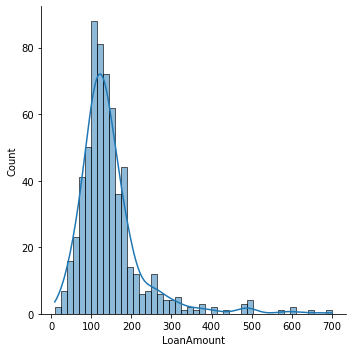

In [30]:
#Visualization to check skewness in ApplicantIncome
import seaborn as sns

sns.displot(dfloan2['LoanAmount'],kde =True)

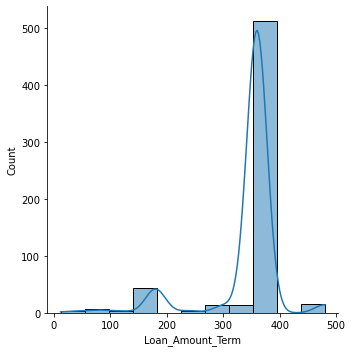

In [31]:
#Visualization to check skewness in ApplicantIncome
import seaborn as sns

sns.displot(dfloan2['Loan_Amount_Term'],kde =True)#Visualization to check skewness in ApplicantIncome
import seaborn as sns



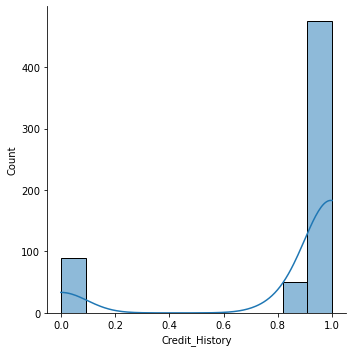

In [32]:
#Visualization to check skewness in ApplicantIncome
import seaborn as sns

sns.displot(dfloan2['Credit_History'],kde =True)#Visualization to check skewness in ApplicantIncome
import seaborn as sns



Observation - There is skewness present in the above features.

<AxesSubplot:ylabel='Credit_History'>

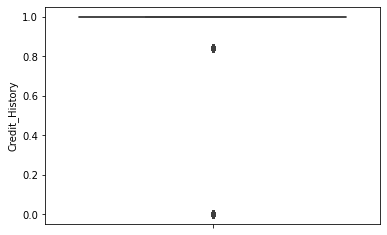

In [33]:
#checking the outliers in the features
#Visualization using boxplot to check the outliers
sns.boxplot(y='Credit_History',data=dfloan2)

<AxesSubplot:ylabel='Loan_Amount_Term'>

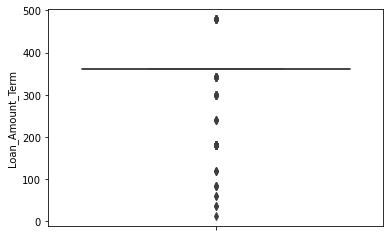

In [34]:
#Visualization using boxplot to check the outliers
sns.boxplot(y='Loan_Amount_Term',data=dfloan2)

<AxesSubplot:ylabel='ApplicantIncome'>

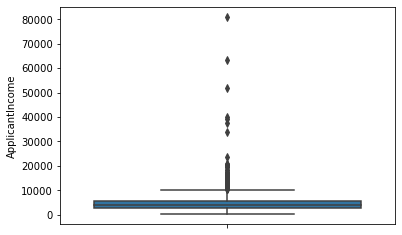

In [35]:
#Visualization using boxplot to check the outliers
sns.boxplot(y='ApplicantIncome',data=dfloan2)

In [36]:
dfloan2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [37]:
# making the Data frame with the Flaot data types 

# Droping the values with Object Data type to create a model in a new dataFrame.

dfloan3 = pd.DataFrame(dfloan2)
# Remove the mentioned columns name
dfloan3.drop(['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'],inplace=True, axis = 1)

In [38]:
dfloan3

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


Observation - There are outliers present in the data set 

# Removal of Outliners

In [39]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(dfloan3))
threshold =3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

<AxesSubplot:>

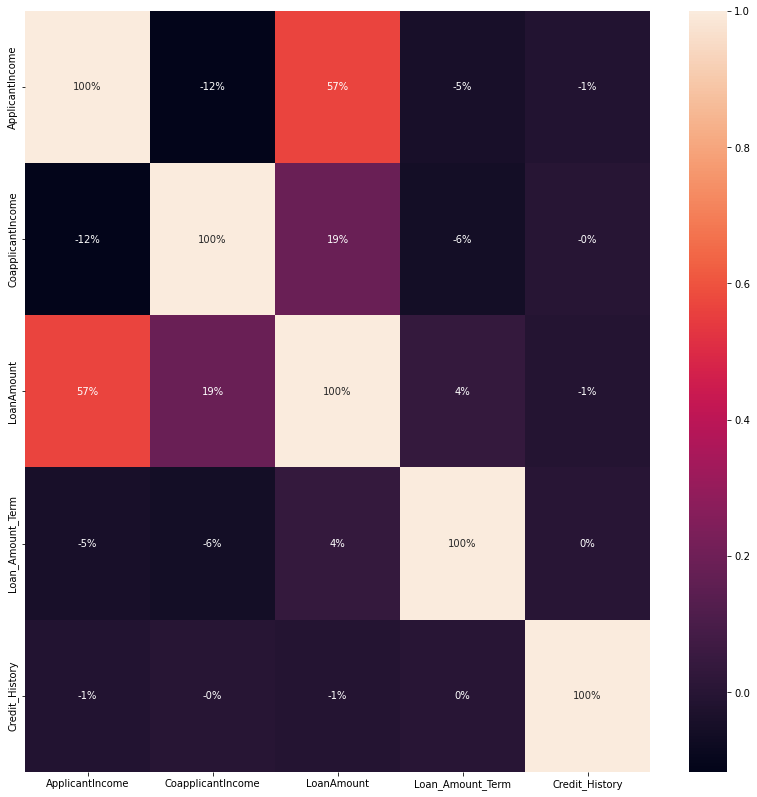

In [40]:
#Visualization using heatmap
plt.figure(figsize=(14,14))  
sns.heatmap(dfloan3.corr(), annot=True, fmt='.0%')

Observation - There is highly corelation between the Applicant Income and the Loan Amount.Let find the Visualization between their corelation

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

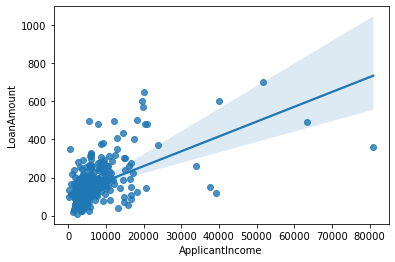

In [41]:
sns.regplot(x = 'ApplicantIncome',y= 'LoanAmount',data=dfloan3)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

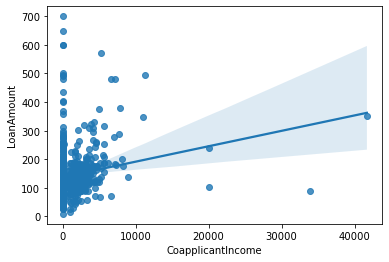

In [42]:
sns.regplot(x = 'CoapplicantIncome',y= 'LoanAmount',data=dfloan3)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

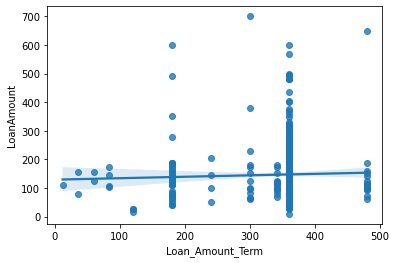

In [43]:
sns.regplot(x = 'Loan_Amount_Term',y= 'LoanAmount',data=dfloan3)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

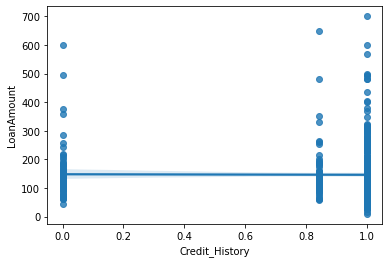

In [44]:
sns.regplot(x = 'Credit_History',y= 'LoanAmount',data=dfloan3)

In [45]:
# Storing new data in dfloan4
dfloan4 = dfloan3[(z<3).all(axis=1)]
dfloan4

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


# Applying Linear Regression approach

In [46]:
features = dfloan4.drop("ApplicantIncome",axis= 1)
target = dfloan4["LoanAmount"]

In [47]:
# implementin MinMax Scalar
from sklearn.preprocessing import MinMaxScaler
mns =   MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [48]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
for i in range(0,100):
        features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
        lr.fit(features_train,target_train)
        pred_train = lr.predict(features_train)
        pred_test = lr.predict(features_test)
        print(f"At random state{i}  :- {r2_score(target_train,pred_train)}")
        print(f"At random state{i} : {r2_score(target_test,pred_test)}")
        print("\n")

At random state0  :- 1.0
At random state0 : 1.0


At random state1  :- 1.0
At random state1 : 1.0


At random state2  :- 1.0
At random state2 : 1.0


At random state3  :- 1.0
At random state3 : 1.0


At random state4  :- 1.0
At random state4 : 1.0


At random state5  :- 1.0
At random state5 : 1.0


At random state6  :- 1.0
At random state6 : 1.0


At random state7  :- 1.0
At random state7 : 1.0


At random state8  :- 1.0
At random state8 : 1.0


At random state9  :- 1.0
At random state9 : 1.0


At random state10  :- 1.0
At random state10 : 1.0


At random state11  :- 1.0
At random state11 : 1.0


At random state12  :- 1.0
At random state12 : 1.0


At random state13  :- 1.0
At random state13 : 1.0


At random state14  :- 1.0
At random state14 : 1.0


At random state15  :- 1.0
At random state15 : 1.0


At random state16  :- 1.0
At random state16 : 1.0


At random state17  :- 1.0
At random state17 : 1.0


At random state18  :- 1.0
At random state18 : 1.0


At random state19  :- 1.0
At ran

# Cross Validation

In [50]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_train,pred_train)

from sklearn.model_selection import cross_val_score
for j in range (2,10):

    cv_score = cross_val_score(lr,features,target ,cv=j )
    cv_mean = cv_score.mean()
print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
print("\n")

At cross fold 9 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for testing is 1.0




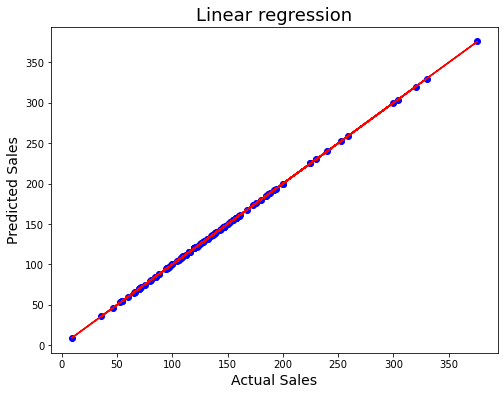

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize =(8,6))
plt.scatter(x=target_test,y=pred_test,color='b')
plt.plot(target_test,target_test,color='r')
plt.xlabel('Actual Sales' ,fontsize=14)
plt.ylabel('Predicted Sales' ,fontsize=14)
plt.title('Linear regression' ,fontsize=18)
plt.show()

# Regularization

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001,.001,.01,.1,1,10],
            'random_state':list(range(0,10))}
ls= Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [53]:
ls= Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100



99.9999874364409

In [54]:

lss= r2_score(target_test,pred_ls)
lss*100

99.99998636337145

In [55]:
pred_ls = ls.predict (features_test)
cv_score = cross_val_score(ls,features,target ,cv=3)
cv_mean = cv_score.mean()
cv_mean *100

99.9999887810877

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print (clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [57]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score (features_train,target_train)
pred_decission=rf.predict(features_test)

rfs = r2_score(target_test,pred_decission)
print('R2 score ',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc =rfscore.mean()
print ('cross validation score',rfc*100)

R2 score  99.44661082116085
cross validation score 99.76073039007245


# Conclution : 


The model is to be considered as accurate model as the R2 score is good as 99.44661082116085 and Cross SCore as 99.76073039007245 .The model developed is 99% accurate.

# Kmeans Model

In [58]:
dfloan4

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [59]:
x= dfloan4.iloc[:,0:3]
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


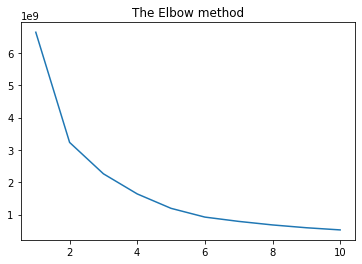

In [61]:
#elbow method 
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel = ('Number of clusters')

In [62]:
# Fitting K means to the dataset
kmeans = KMeans(n_clusters = 2, init ='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 

In [63]:
# It predicts the cluster number to which datapoints belong to 
test = kmeans.predict(np.asarray([[4583,1508,128]]))
test[0]

1

Observation - The Prediction is working perfect

In [64]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

TypeError: 'str' object is not callable

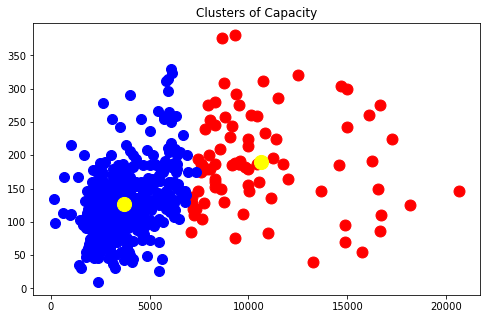

In [72]:
#Visualising the Cluster


plt.figure(figsize=(8,5))
plt.scatter(x[y_kmeans == 0]['ApplicantIncome'],x[y_kmeans == 0]['LoanAmount'],s = 120, c='red',label ='centroids')
plt.scatter(x[y_kmeans == 1]['ApplicantIncome'],x[y_kmeans == 1]['LoanAmount'],s = 100, c='blue',label ='centroids')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=200, c='yellow',label ='centroids')
plt.title('Clusters of Capacity')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import 